___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part - 2<br><br>Multivariate Time Series Forecasting with RNN<br><br>(Time Series Generator)<br><h1>

# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

In [2]:
df = pd.read_csv('../data/energydata_complete.csv',index_col='date', parse_dates = True)

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


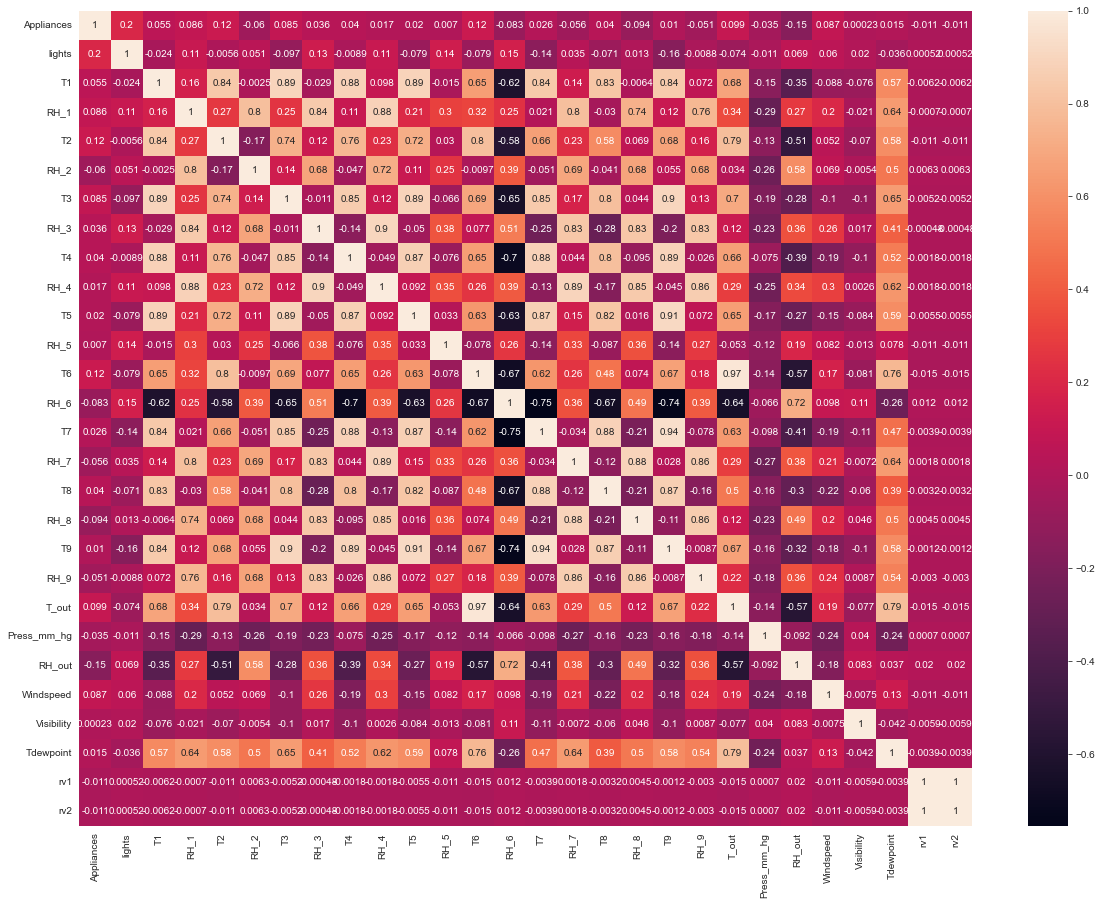

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [7]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [9]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


In [11]:
df_a = df[["Appliances", "lights"]]
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [12]:
df_a = df_a.resample("H").sum() # convert to hourly data, Index must be date data
df_b = df_b.resample("H").mean()

In [13]:
df = pd.concat([df_a, df_b], axis =1)
df.head()

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [14]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [15]:
df = df.round(2)

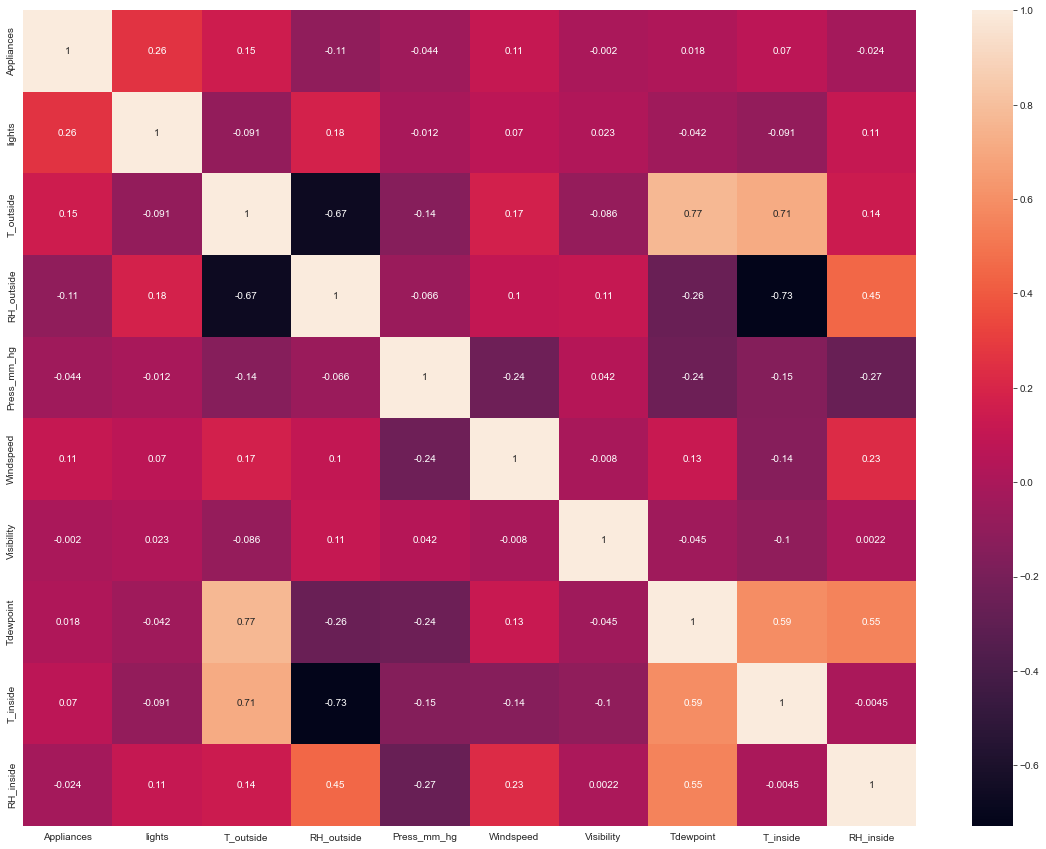

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

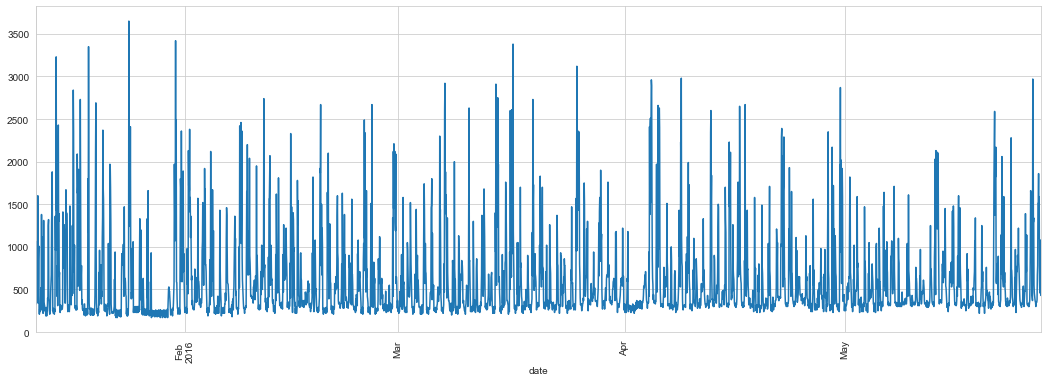

In [17]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

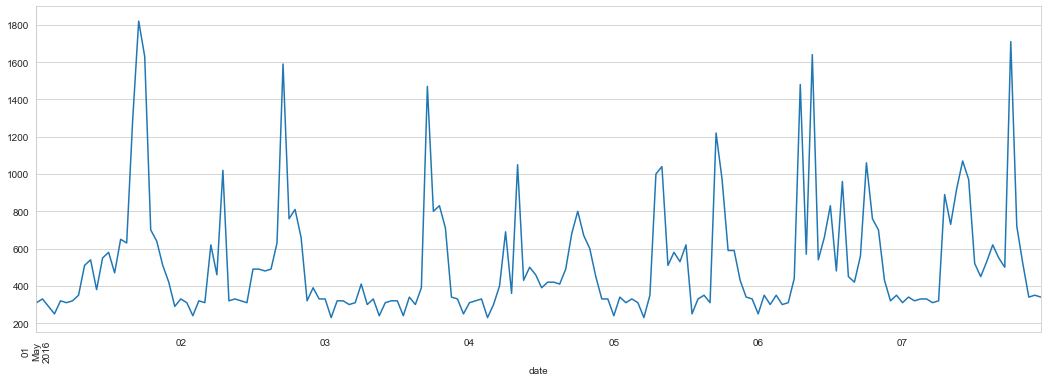

In [18]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-07 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

## Train Test Split

In [19]:
len(df)

3290

In [20]:
# How many rows per day?
24

24

In [21]:
test_days = 7

In [22]:
test_ind = test_days*24

In [23]:
test_ind

168

In [24]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [25]:
train.shape, test.shape

((3122, 10), (168, 10))

## Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Modelling

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [31]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3122, 3098, 168, 144)

In [47]:
n_features = train_scaled.shape[1]

In [48]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

2022-06-19 23:04:04.731877: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [75]:
early_stop = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights = True)

In [76]:
model.fit(x = generator,
          epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
3266/3266 [==============================] - 254s 71ms/step - loss: 0.0089 - val_loss: 0.0051
Epoch 2/20
3266/3266 [==============================] - 245s 75ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 3/20
3266/3266 [==============================] - 212s 65ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 4/20
3266/3266 [==============================] - 204s 62ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 5/20
3266/3266 [==============================] - 234s 72ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 6/20
3266/3266 [==============================] - 184s 56ms/step - loss: 0.0040 - val_loss: 0.0041


KeyboardInterrupt: 

<AxesSubplot:>

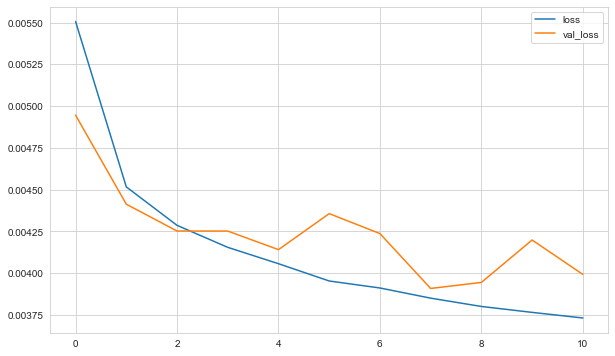

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [56]:
train_scaled

array([[0.04597701, 0.67741935, 0.36747872, ..., 0.53060285, 0.24072217,
        0.72111369],
       [0.25574713, 1.        , 0.35544467, ..., 0.51265532, 0.23971916,
        0.71972158],
       [0.25      , 0.48387097, 0.34605225, ..., 0.5002301 , 0.26780341,
        0.81948956],
       ...,
       [0.03448276, 0.        , 0.79189903, ..., 0.86746434, 0.72016048,
        0.65614849],
       [0.08045977, 0.        , 0.78544174, ..., 0.81316153, 0.73420261,
        0.69605568],
       [0.0862069 , 0.03225806, 0.76342824, ..., 0.75977911, 0.75025075,
        0.80510441]])

In [57]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [58]:
predictions_scaled

[array([0.03272367, 0.01362144, 0.72493464, 0.06412733, 0.65274894,
        0.33573696, 0.5856743 , 0.75643635, 0.746358  , 0.7574221 ],
       dtype=float32),
 array([ 0.01460046, -0.01117106,  0.6920741 ,  0.15673786,  0.63940334,
         0.33354676,  0.56241333,  0.76811624,  0.7360955 ,  0.6980221 ],
       dtype=float32),
 array([ 0.00408946, -0.02688114,  0.67048687,  0.23435076,  0.6231762 ,
         0.33666068,  0.55579686,  0.7789364 ,  0.7243088 ,  0.6752743 ],
       dtype=float32),
 array([-0.00223711, -0.03621106,  0.6558006 ,  0.29482993,  0.6084298 ,
         0.34113958,  0.5530547 ,  0.7894564 ,  0.7148181 ,  0.666504  ],
       dtype=float32),
 array([-0.00645179, -0.044443  ,  0.64735174,  0.33797514,  0.59494567,
         0.34570047,  0.55187654,  0.79749507,  0.7082952 ,  0.6620874 ],
       dtype=float32),
 array([-0.00889082, -0.05398768,  0.6449356 ,  0.36465746,  0.58189106,
         0.3500963 ,  0.55212194,  0.8020109 ,  0.70495176,  0.6577043 ],
       dtype=

In [59]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -4.207526793838625 
mae: 0.10193861138812015 
mse: 0.01859998612770574 
rmse: 0.13638176611155078


## Inverse Transformation and Comparing

In [60]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions = pd.DataFrame(data=predictions,columns=test.columns)
predictions

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
0,283.878,4.223,18.769,7.342,757.370,4.644,39.243,9.957,23.461,47.332
1,220.810,-3.463,17.649,16.501,756.798,4.616,37.741,10.211,23.359,46.052
2,184.231,-8.333,16.913,24.177,756.102,4.655,37.313,10.446,23.241,45.562
3,162.215,-11.225,16.413,30.159,755.469,4.712,37.136,10.675,23.147,45.373
4,147.548,-13.777,16.125,34.426,754.891,4.769,37.060,10.850,23.082,45.278
5,139.060,-16.736,16.043,37.065,754.331,4.824,37.076,10.948,23.048,45.184
6,139.115,-20.049,16.150,38.239,753.762,4.871,37.197,10.971,23.047,45.057
7,149.778,-23.270,16.420,38.167,753.166,4.902,37.413,10.932,23.075,44.895
8,171.894,-25.924,16.815,37.089,752.534,4.911,37.691,10.843,23.129,44.701
9,204.968,-27.669,17.302,35.254,751.866,4.897,37.992,10.720,23.204,44.479


In [61]:
test_new = test[:length]

In [62]:
test_new

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-05-20 19:00:00,390,0,20.080,1.390,758.040,4.580,40.000,9.260,23.440,45.860
2016-05-20 20:00:00,420,0,16.120,10.870,758.100,3.170,40.000,9.120,23.290,44.830
2016-05-20 21:00:00,390,10,14.000,26.340,758.180,1.580,40.000,10.330,23.180,44.700
2016-05-20 22:00:00,320,10,13.100,34.750,758.300,1.000,40.000,10.840,23.140,45.040
2016-05-20 23:00:00,270,0,13.220,42.260,758.170,1.420,35.420,11.610,23.090,45.380
2016-05-21 00:00:00,290,0,13.040,47.210,757.880,2.420,28.580,12.640,23.050,45.670
2016-05-21 01:00:00,310,0,13.240,50.420,757.490,3.420,33.000,12.660,23.020,45.800
2016-05-21 02:00:00,340,0,12.950,50.820,757.080,4.000,40.000,12.600,23.000,45.870
2016-05-21 03:00:00,290,0,12.390,51.640,756.780,4.000,35.420,12.480,22.980,45.930


In [63]:
for i in test_new.columns:
    print(i)
    eval_metrics(test_new[i], predictions[i])
    print("--"*15)

Appliances
r2_score: -0.20504150781482444 
mae: 550.3099259609977 
mse: 716176.0429108852 
rmse: 846.271849296008
------------------------------
lights
r2_score: -11.036865160891908 
mae: 18.2749812304246 
mse: 392.8699045568887 
rmse: 19.820946106502806
------------------------------
T_outside
r2_score: 0.4652167030585811 
mae: 3.446596727396051 
mse: 13.92849103911584 
rmse: 3.7320893664428563
------------------------------
RH_outside
r2_score: 0.5052120658397777 
mae: 14.412779582478104 
mse: 246.8763484624195 
rmse: 15.712299273576082
------------------------------
Press_mm_hg
r2_score: -18.933819355211067 
mae: 5.751942158540142 
mse: 39.62873396188892 
rmse: 6.295135738162356
------------------------------
Windspeed
r2_score: -0.3193224899073781 
mae: 1.8752491956204178 
mse: 4.648720518972264 
rmse: 2.156089172314602
------------------------------
Visibility
r2_score: -0.2886497481912067 
mae: 4.8316811369359485 
mse: 45.34274123982103 
rmse: 6.73370189716036
-------------------

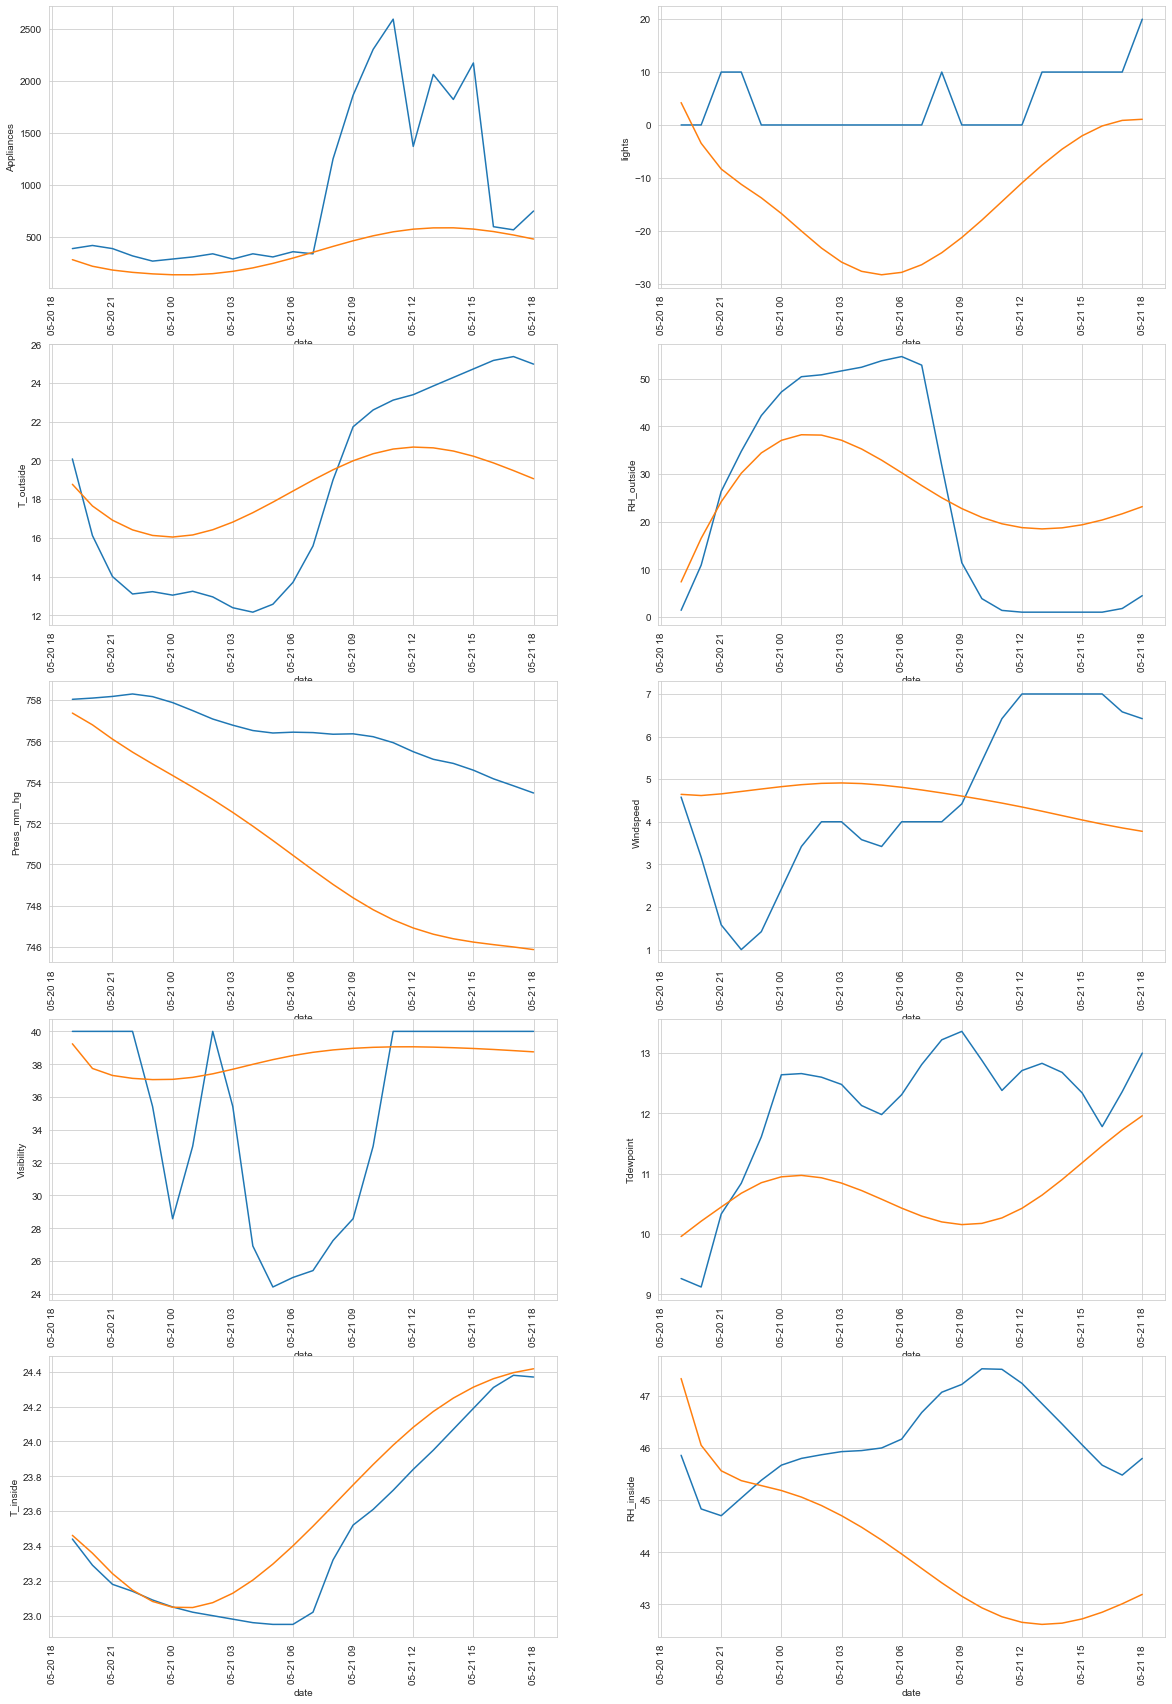

In [64]:
index = 0
plt.figure(figsize = (20, 30))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test_new[i])
    test_eva["predictions"] = predictions[i].values
    plt.subplot(5, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i])
    sns.lineplot(x = test_eva.index, y = test_eva.predictions)
    plt.xticks(rotation=90);

In [ ]:
compare = test_new[["Appliances"]]
compare["prediction"] = predictions["Appliances"].values
compare

,Appliances,prediction
date,,
2016-05-20 19:00:00,390,521.947
2016-05-20 20:00:00,420,559.663
2016-05-20 21:00:00,390,582.192
2016-05-20 22:00:00,320,596.152
2016-05-20 23:00:00,270,604.523
2016-05-21 00:00:00,290,609.391
2016-05-21 01:00:00,310,612.538
2016-05-21 02:00:00,340,615.447
2016-05-21 03:00:00,290,619.239


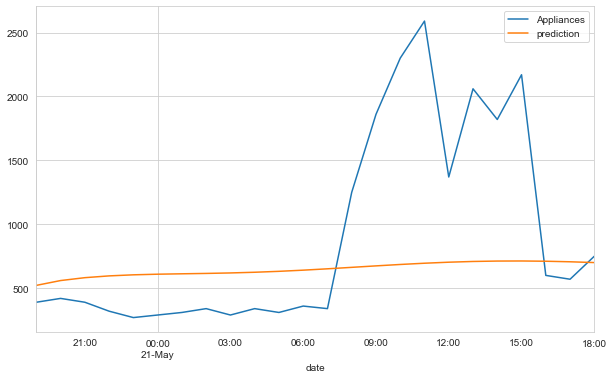

In [ ]:
compare.plot();

# Retrain and Forecasting

In [65]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [66]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [68]:
model = Sequential()

model.add(LSTM(100,input_shape=(length, n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x = generator, epochs=15)

Epoch 1/15
205/205 [==============================] - 4s 12ms/step - loss: 0.0238
Epoch 2/15
205/205 [==============================] - 2s 12ms/step - loss: 0.0110
Epoch 3/15
205/205 [==============================] - 3s 13ms/step - loss: 0.0087
Epoch 4/15
205/205 [==============================] - 3s 12ms/step - loss: 0.0074
Epoch 5/15
205/205 [==============================] - 2s 12ms/step - loss: 0.0066
Epoch 6/15
205/205 [==============================] - 3s 12ms/step - loss: 0.0060
Epoch 7/15
205/205 [==============================] - 2s 11ms/step - loss: 0.0057
Epoch 8/15
205/205 [==============================] - 2s 12ms/step - loss: 0.0054
Epoch 9/15
205/205 [==============================] - 2s 12ms/step - loss: 0.0051
Epoch 10/15
205/205 [==============================] - 3s 13ms/step - loss: 0.0050
Epoch 11/15
205/205 [==============================] - 3s 13ms/step - loss: 0.0047
Epoch 12/15
205/205 [==============================] - 3s 12ms/step - loss: 0.0045
Epoch 13/15
2

<AxesSubplot:>

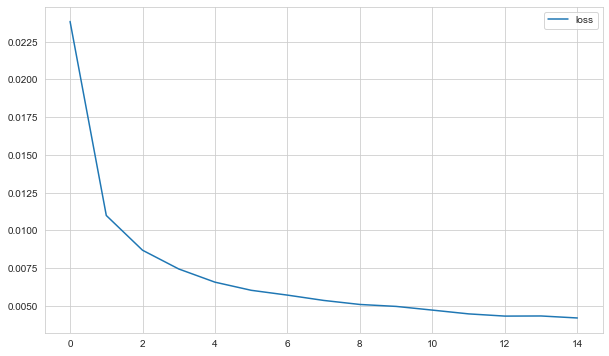

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [ ]:
forecast = full_scaler.inverse_transform(predictions_scaled)
forecast

array([[ 6.78513872e+02,  7.89144463e-01,  1.99477742e+01,
         6.95579294e+00,  7.55800268e+02,  4.31870903e+00,
         2.84674349e+01,  1.22383944e+01,  2.43472656e+01,
         4.65206687e+01],
       [ 6.70955232e+02, -6.37207737e+00,  1.81847552e+01,
         1.14125049e+01,  7.55939290e+02,  4.57087941e+00,
         2.76230986e+01,  1.19016505e+01,  2.41547348e+01,
         4.67783496e+01],
       [ 6.49405780e+02, -9.26659605e+00,  1.64289492e+01,
         1.59677464e+01,  7.56186385e+02,  4.67618353e+00,
         2.76808644e+01,  1.15375543e+01,  2.39686036e+01,
         4.70456255e+01],
       [ 6.23700274e+02, -1.02455753e+01,  1.48232935e+01,
         2.02291794e+01,  7.56495563e+02,  4.70172750e+00,
         2.77853175e+01,  1.11841514e+01,  2.37869329e+01,
         4.73082002e+01],
       [ 5.99358400e+02, -1.04805794e+01,  1.34625154e+01,
         2.39341590e+01,  7.56846846e+02,  4.69722329e+00,
         2.77852749e+01,  1.08334204e+01,  2.36125258e+01,
         4.

In [ ]:
df

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.590,84.260,733.750,6.170,53.420,5.050,18.420,46.550
2016-01-11 18:00:00,1060,310,6.180,87.200,734.270,5.420,40.000,4.660,18.410,46.520
2016-01-11 19:00:00,1040,150,5.860,88.130,734.790,6.000,40.000,4.390,18.690,48.670
2016-01-11 20:00:00,750,210,5.470,86.930,735.280,6.000,40.000,4.020,18.940,50.360
2016-01-11 21:00:00,620,140,5.580,86.130,735.570,6.000,40.000,3.820,19.250,48.980
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,610,10,25.570,1.000,755.800,2.000,21.580,13.480,24.850,45.890
2016-05-27 15:00:00,460,0,26.280,1.000,755.670,2.000,21.830,13.260,24.840,45.420
2016-05-27 16:00:00,810,0,26.140,1.000,755.380,2.420,22.580,13.280,24.890,45.990


In [ ]:
forecast_index = pd.date_range(start = '2016-05-27 19:00:00', periods = length, freq = 'H')
forecast_index

DatetimeIndex(['2016-05-27 19:00:00', '2016-05-27 20:00:00',
               '2016-05-27 21:00:00', '2016-05-27 22:00:00',
               '2016-05-27 23:00:00', '2016-05-28 00:00:00',
               '2016-05-28 01:00:00', '2016-05-28 02:00:00',
               '2016-05-28 03:00:00', '2016-05-28 04:00:00',
               '2016-05-28 05:00:00', '2016-05-28 06:00:00',
               '2016-05-28 07:00:00', '2016-05-28 08:00:00',
               '2016-05-28 09:00:00', '2016-05-28 10:00:00',
               '2016-05-28 11:00:00', '2016-05-28 12:00:00',
               '2016-05-28 13:00:00', '2016-05-28 14:00:00',
               '2016-05-28 15:00:00', '2016-05-28 16:00:00',
               '2016-05-28 17:00:00', '2016-05-28 18:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
forecast_df = pd.DataFrame(data = forecast[:,:1], index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2016-05-27 19:00:00,678.514
2016-05-27 20:00:00,670.955
2016-05-27 21:00:00,649.406
2016-05-27 22:00:00,623.700
2016-05-27 23:00:00,599.358
2016-05-28 00:00:00,581.253
2016-05-28 01:00:00,573.337
2016-05-28 02:00:00,578.049
2016-05-28 03:00:00,596.438
2016-05-28 04:00:00,628.025


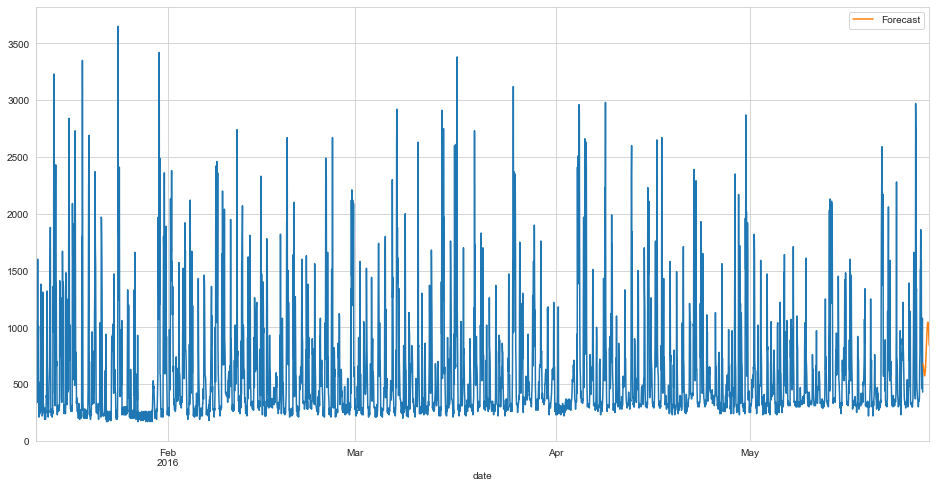

In [ ]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(406722.0, 406794.0)

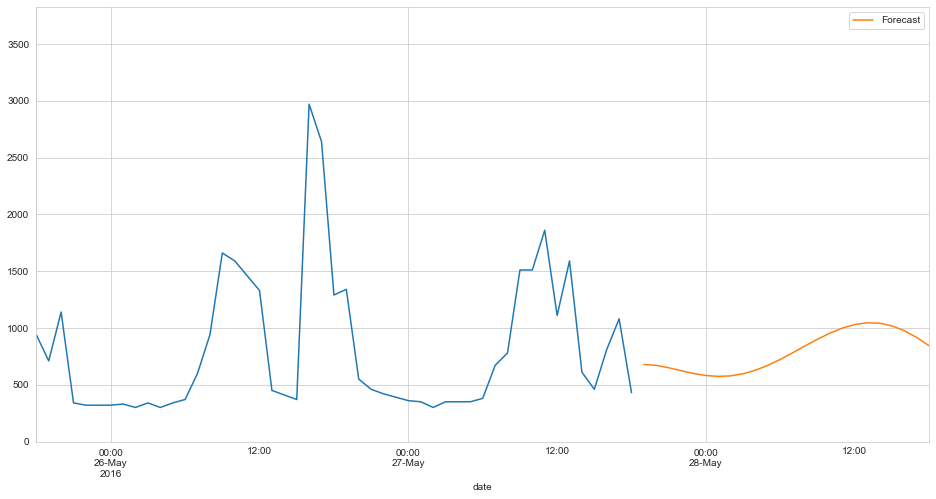

In [ ]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim("2016-05-25 18:00:00", "2016-05-28 18:00:00")

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>